# Heart Disease Final Report
Group 41: Bowen Cui, Can Huang, Nicholas Huang, Ray Zhou

## Introduction


In 2017, the Canadian Chronic Disease Surveillance System reported that every hour that passes, approximately 14 Canadians with diagnosed heart disease will die. Heart disease is widespread and is a medical concern that requires a very high level of care and oftentimes can go undetected, until an individual experiences a heart failure, which is often fatal. Therefore, it is crucial that we recognize the impact that heart disease has on our population and as such, we will explore a dataset to analyze the blood pressure and cholesterol difference between people with heart disease and people without heart disease aiming to raise awareness about when to seek medical attention regarding blood pressure.





<img src= "https://www.heart.org/-/media/Images/Around-the-AHA/2022-Top-10_SC.jpg" width = "400" />
<div style="text-align: center"><i>Image from <a href="https://www.heart.org/en/around-the-aha/top-cardiovascular-research-advances-of-2022">AHA.com</i></a></div>

For these reasons, we pose a question: “Is the mean blood pressure and mean cholesterol of people with heart disease higher than people without heart disease?” To answer this question, we are using a Heart Disease Dataset from the UC Irvine Machine Learning Repository. (Original Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease) The dataset contains data about patients provided from cardiovascular clinics by physicians. Our project will focus on the data from Cleveland, USA. We will analyze the following columns (variables):
- `chol` serum cholesterol (mg/dl)
- `trestbps` resting blood pressure (on admission to the hospital) (mm Hg)
- `num` diagnosis of heart disease

## Preliminary Exploratory Data Analysis

**Loading R libraries**

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Reading Data from UCI Web Source into R**

In [2]:
set.seed(41)
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "heart_disease")

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0 
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0 
  heart_disease
1 0            
2 2            
3 1            
4 0            
5 0            
6 0

**Wrangling Data**

In [3]:
set.seed(41)
filtered_data <- cleveland_data |>
    filter(ca != "?", thal != "?")|>
    drop_na()

mutate_data <- filtered_data |>
    mutate(heart_disease = ifelse(heart_disease == 0, "Absent", "Present")) |>
    mutate(heart_disease = as_factor(heart_disease))

head(mutate_data)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0 
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0 
  heart_disease
1 Absent       
2 Present      
3 Present      
4 Absent       
5 Absent       
6 Absent

**Statistics of the parameters**

The table below shows the mean, median, and stardard deviation values of the `Resting Blood Pressure` and `Cholesterol Level` .

In [4]:
set.seed(41)
mean_bp <- mutate_data |>
group_by(heart_disease)|>
summarise(mean = mean(trestbps), median = median(trestbps), sd = sd(trestbps))

mean_bp

heart_disease mean    median sd      
1 Absent        129.175 130    16.37399
2 Present       134.635 130    18.89673

[table 1.0]

In [5]:
set.seed(41)
mean_ch <- mutate_data |>
group_by(heart_disease)|>
summarise(mean = mean(chol), median = median(chol), sd = sd(chol))

mean_ch

heart_disease mean     median sd      
1 Absent        243.4938 235.5  53.75755
2 Present       251.8540 253.0  49.67994

[table 1.1]

**Examining the distribution of heart disease**

In the following visualization, we examine the distribution of `heart disease`. The graph shows that the occurrence of heart disease in patients is only marginally more frequent than its absence, indicating a fairly even distribution, which is what we want :).

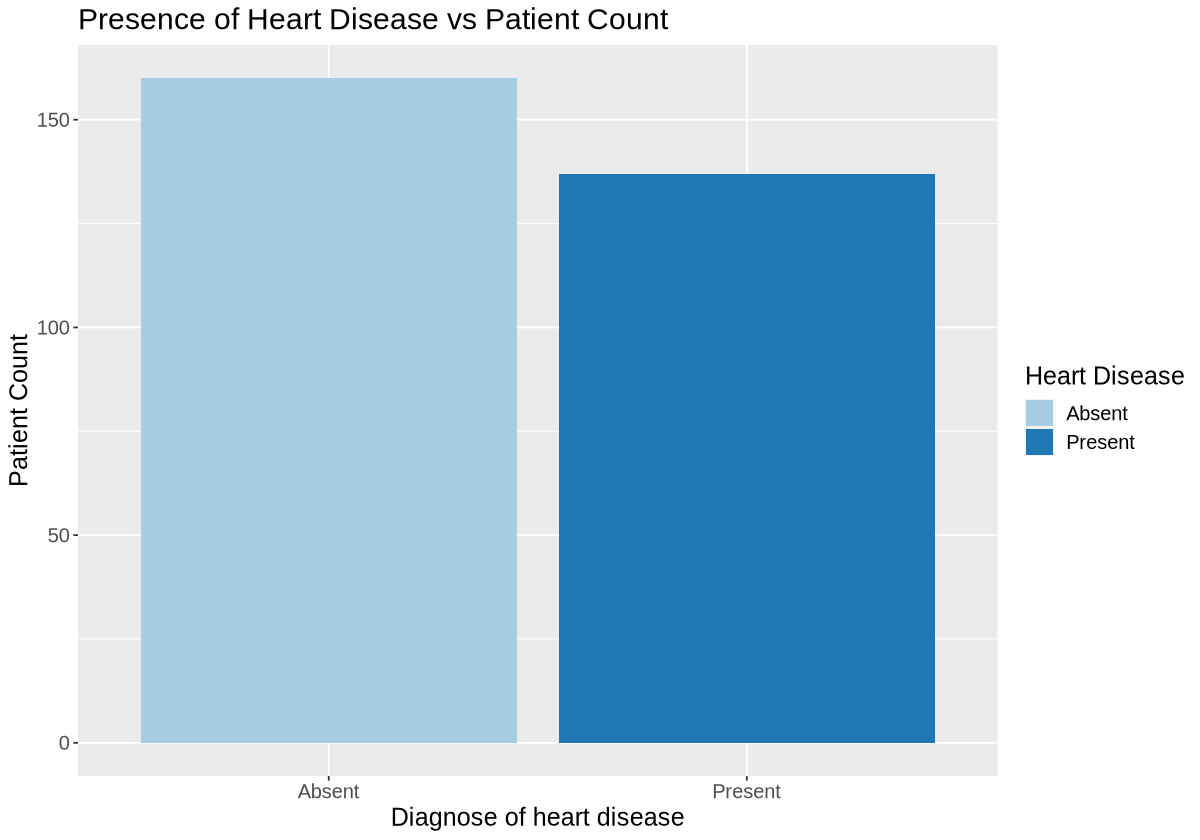

In [6]:
set.seed(41)
options(repr.plot.width=10, repr.plot.height=7)

counting_types <- mutate_data |>
    group_by(heart_disease)|>
    summarize(types_count = n()) 

type_vs_heart_disease <- counting_types |>
    ggplot(aes(x = heart_disease, y = types_count, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", fill = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_brewer(palette = "Paired")+
    theme(text = element_text(size = 15))
                      
type_vs_heart_disease

[Graph 1.0]

**Distribution of Resting Blood Pressure**


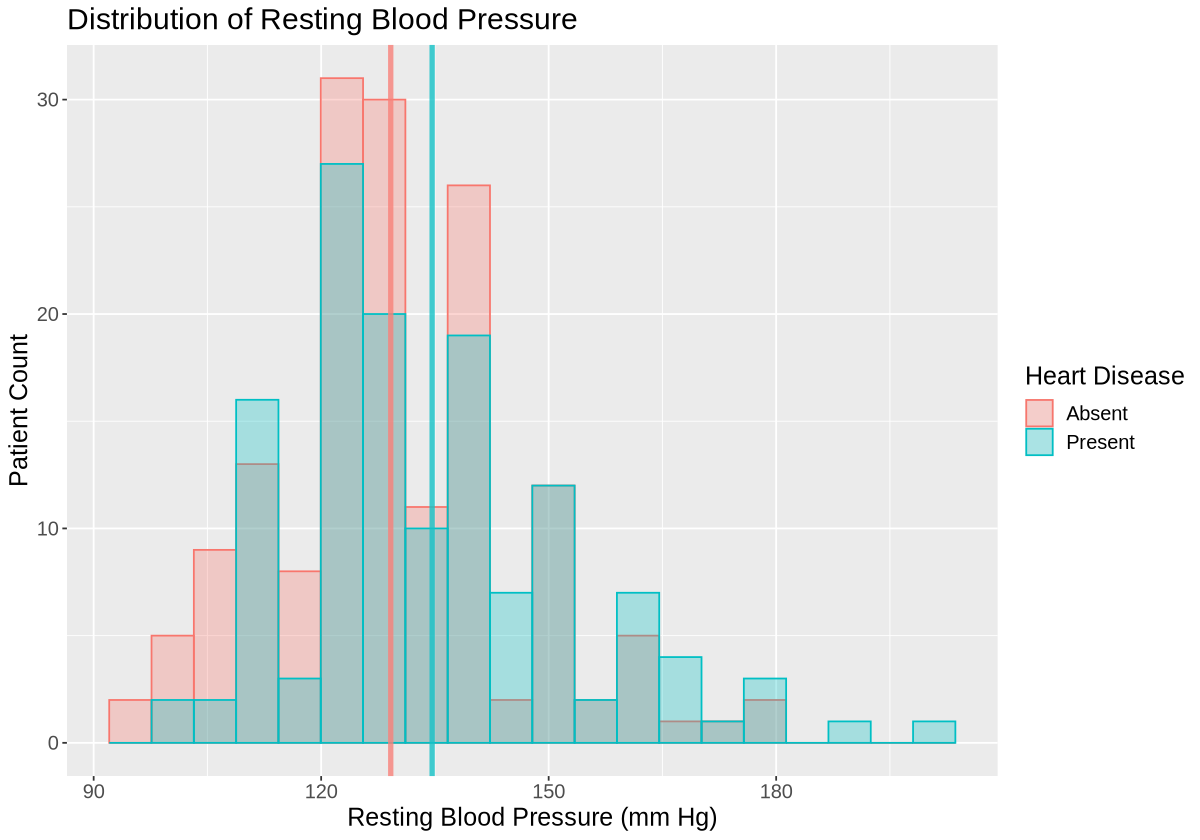

In [7]:
set.seed(41)
dis_bp_S <- mutate_data |>
    ggplot() +
    geom_histogram(aes(x = trestbps, fill = heart_disease, color = heart_disease), alpha = 0.3, position = 'identity', bins = 20) +
    geom_vline(xintercept = mean_bp$mean[1], color = "#f78179", alpha=.8, lwd=1.5) + 
    geom_vline(xintercept = mean_bp$mean[2], color = "#14c2c7", alpha=.8, lwd=1.5) + 
    labs(x = "Resting Blood Pressure (mm Hg)",y = "Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    scale_color_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Distribution of Resting Blood Pressure") +
    theme(text = element_text(size = 15))


dis_bp_S

[Graph 1.1]

**Box plot of Resting Blood Pressure**

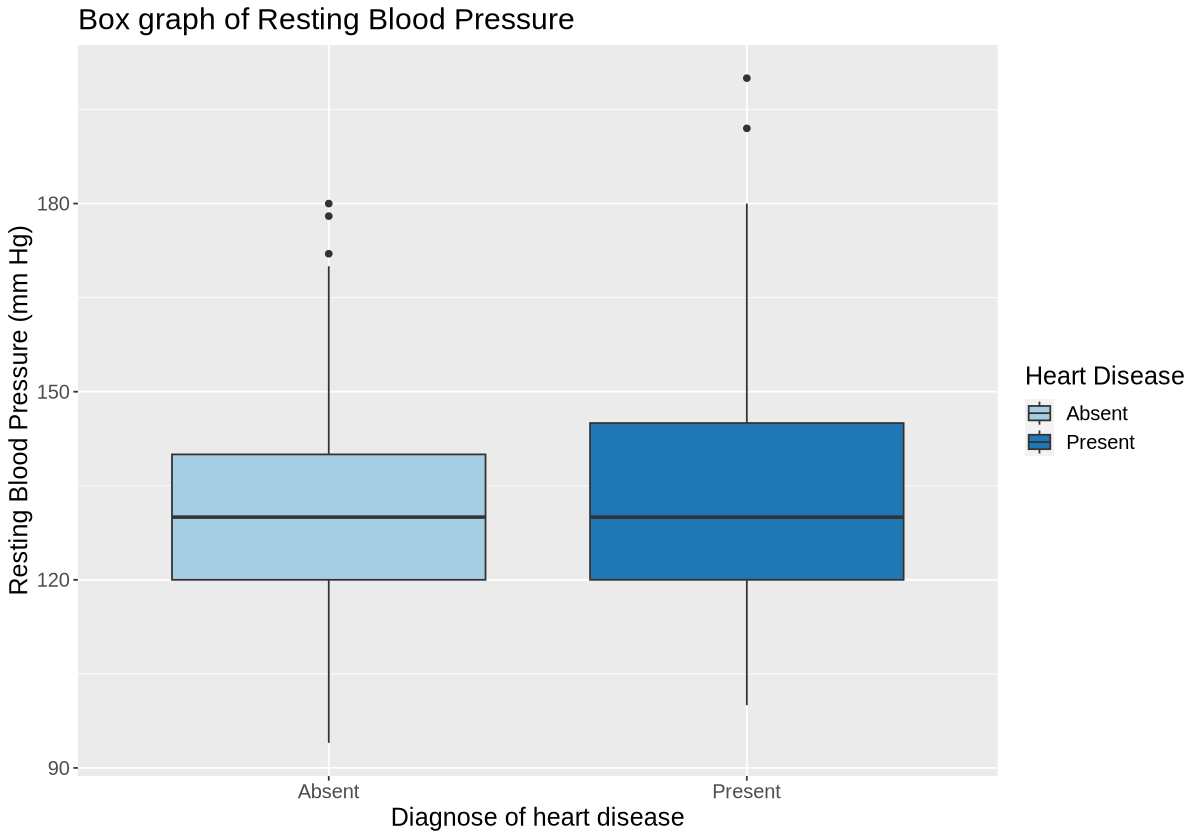

In [8]:
set.seed(41)

box_plot <- mutate_data |>
    ggplot(aes(x = heart_disease, y = trestbps, fill = heart_disease)) +
    geom_boxplot() +
    labs(x = "Diagnose of heart disease",y = "Resting Blood Pressure (mm Hg)", fill = "Heart Disease") +
    ggtitle("Box graph of Resting Blood Pressure") +
    scale_fill_brewer(palette = "Paired")+
    theme(text = element_text(size = 15))
box_plot                  

[Graph 1.2]

**Plotting distribution of Cholesterol Level for each group**

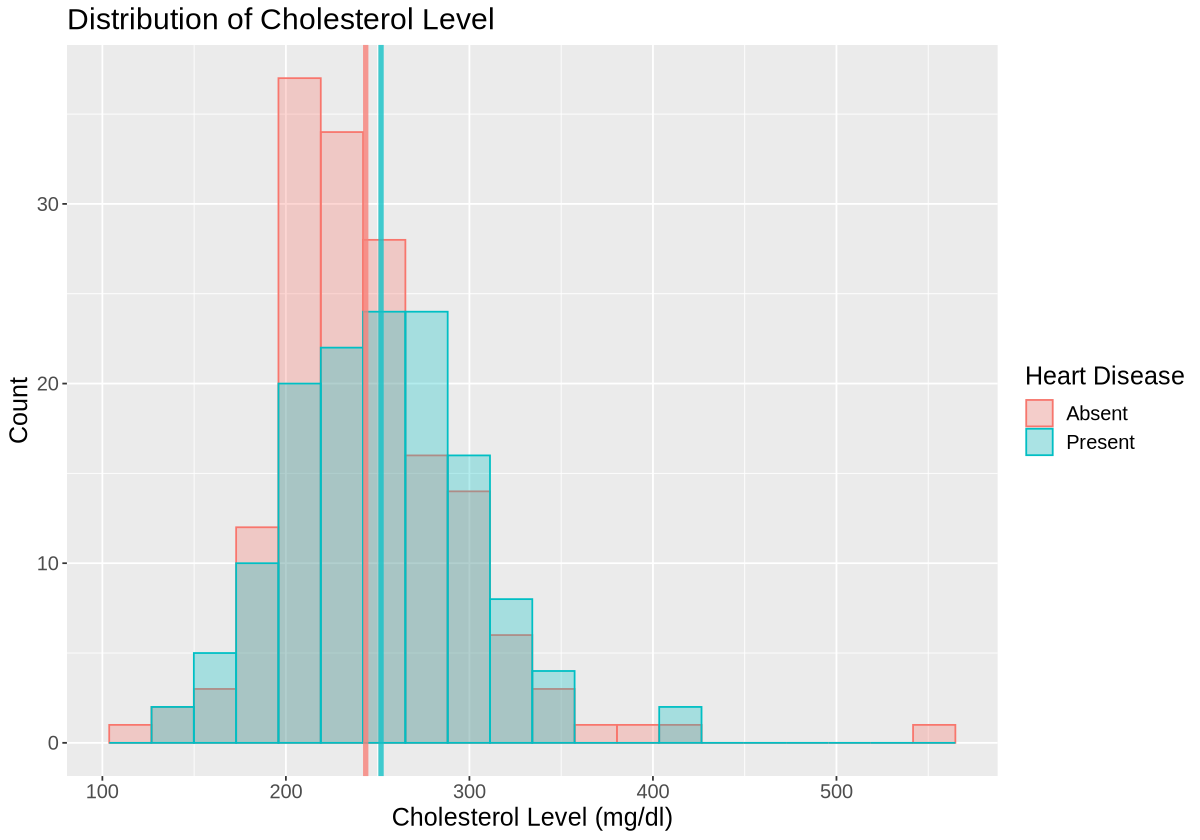

In [9]:
set.seed(41)
dis_ch <- mutate_data |>
    ggplot() +
    geom_histogram(aes(x = chol, fill = heart_disease, color = heart_disease), alpha = 0.3, position = 'identity', bins = 20) +
    labs(x = "Cholesterol Level (mg/dl)",y = "Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    scale_color_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    geom_vline(xintercept = mean_ch$mean[1], color = "#f78179", alpha=.8, lwd=1.5) + 
    geom_vline(xintercept = mean_ch$mean[2], color = "#14c2c7", alpha=.8, lwd=1.5) + 
    ggtitle("Distribution of Cholesterol Level") +
    theme(text = element_text(size = 15))
dis_ch

[Graph 1.3]

**Box plot of Cholesterol Level between groups**

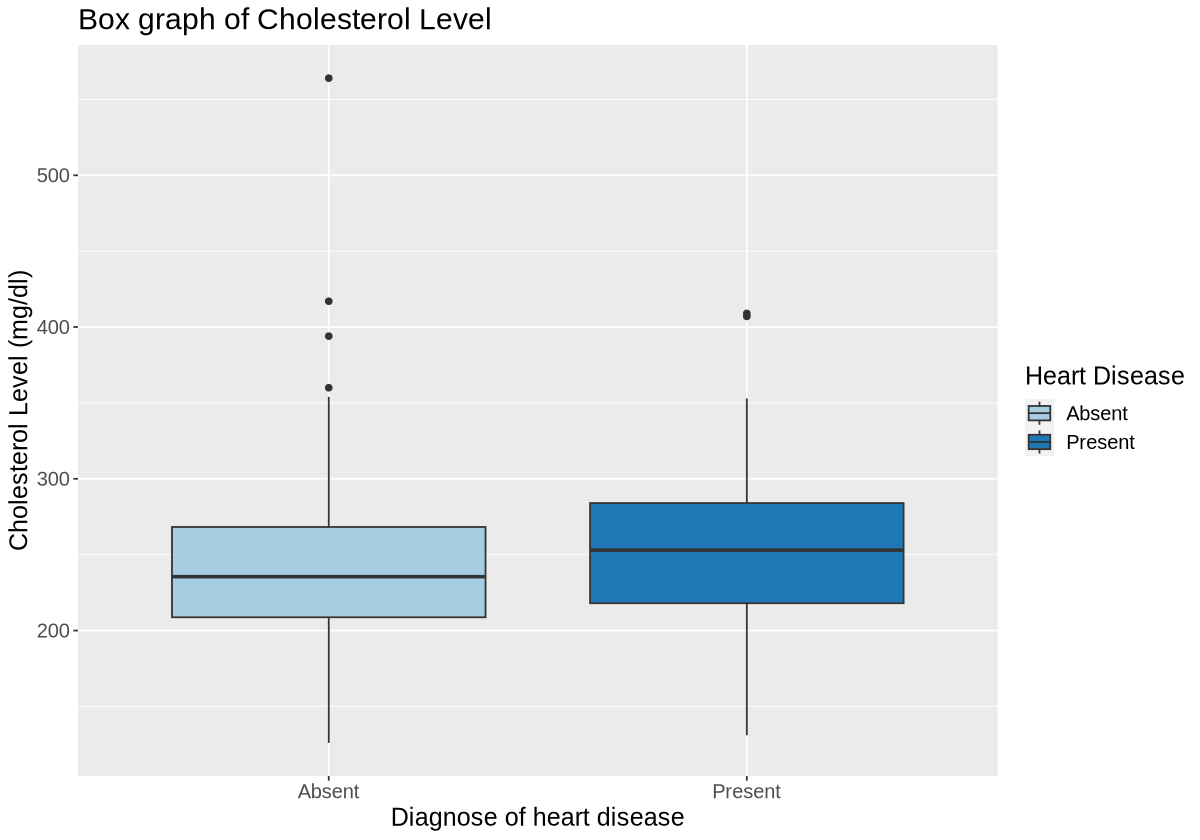

In [10]:
set.seed(41)
options(repr.plot.width=10, repr.plot.height=7)
box_plot <- mutate_data |>
    ggplot(aes(x = heart_disease, y = chol, fill = heart_disease)) +
    geom_boxplot() +
    labs(x = "Diagnose of heart disease",y = "Cholesterol Level (mg/dl)", fill = "Heart Disease") +
    ggtitle("Box graph of Cholesterol Level") +
    scale_fill_brewer(palette = "Paired")+
    theme(text = element_text(size = 15))
box_plot   

[Graph 1.4]

**Exploring Correlations between variables through ggpairs()**

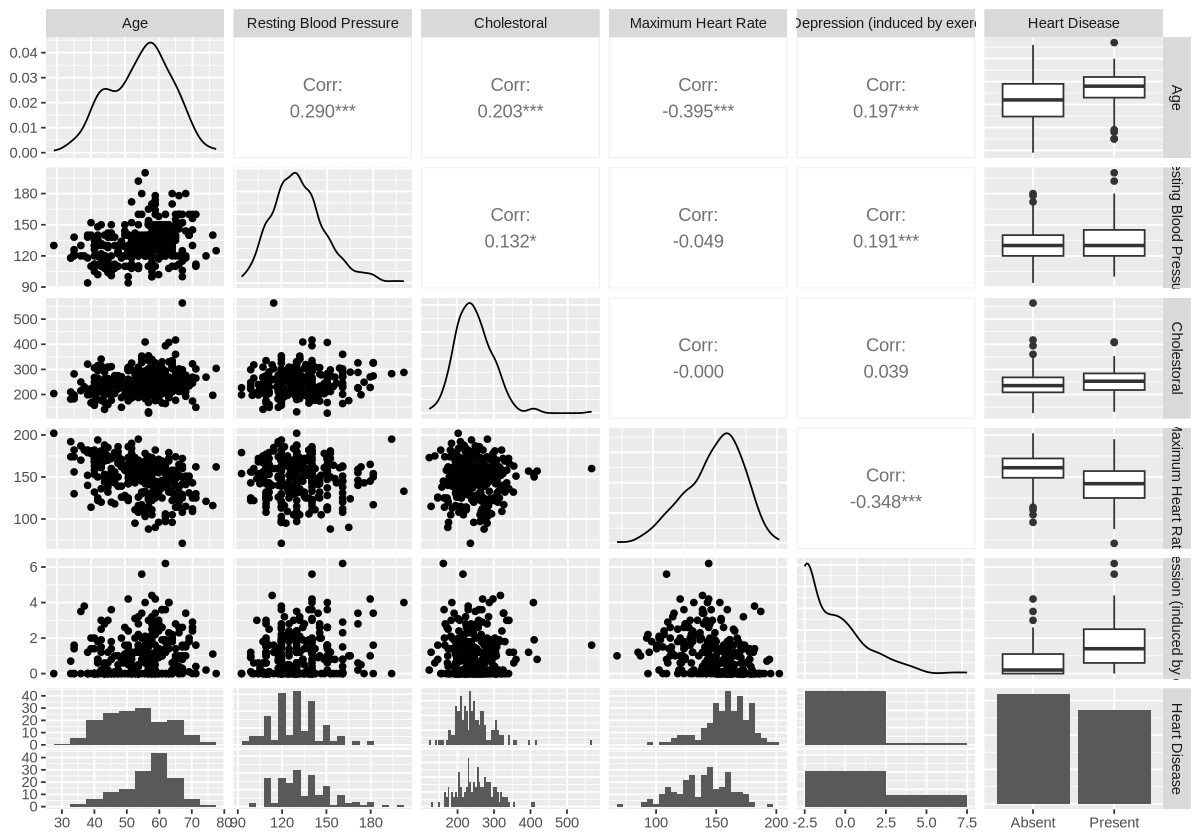

In [11]:
heart_ggpair <- mutate_data |>
    ggpairs(lower = list(combo = wrap(ggally_facethist, binwidth = 5)),
            columns = c("age", "trestbps", "chol", "thalach", "oldpeak", "heart_disease"),
            columnLabels = c("Age", "Resting Blood Pressure", "Cholestoral", "Maximum Heart Rate", "ST Depression (induced by exercise)", "Heart Disease"))

heart_ggpair

[Graph 1.5]

## Methods

Our report is based on the correlation findings between variables visualized in the above step, where we observed a potential correlation between Resting Blood Pressure with Heart Disease and Cholesterol with Heart Disease. Based on our preliminary analysis, we have observed an approximately equal distribution of patients with heart disease and without heart disease. Also from a visual histogram of resting blood pressure and cholesterol amongst patients, we notice a trend that people without heart disease tend to have lower blood pressure and cholesterol levels, and people with heart disease tend to have higher blood pressure and cholesterol. Considering where our sample is taken from, our inferential question becomes: "Is the mean blood pressure and mean cholesterol of patients of cardiologists with heart disease higher than patients without heart disease?". The dataset we have access to is only a sample of size 303, so we must check whether our results from the preliminary analysis aren't due to sampling variation alone. We intend to conduct hypothesis testing to determine if the mean blood pressure and cholesterol levels in patients with heart disease are greater than in patients without heart disease. We will conduct these tests at the 5% significance level since it is most commonly used in hypothesis tests.

We will have two sets of hypothesis testing:

$$\mu_{yes} = \text{mean of blood pressure in patients with heart disease}$$
$$\mu_{no} = \text{mean of blood pressure in patients without heart disease}$$
$$H_0: \mu_{yes} - \mu_{no} = 0$$
$$H_A: \mu_{yes} - \mu_{no} > 0$$

$$\nu_{yes} = \text{mean of cholesterol levels in patients with heart disease}$$
$$\nu_{no} = \text{mean of cholesterol levels in patients without heart disease}$$
$$H_0: \nu_{yes} - \nu_{no} = 0$$
$$H_A: \nu_{yes} - \nu_{no} > 0$$

We will also perform bootstrap sampling with 1000 replications to analyze the sampling distribution and the 95% confidence interval. We expect our hypothesis to be true based on medical research that states patients with heart disease tend to have higher blood pressure and cholesterol levels than patients without heart disease (Cleveland Clinic, 2022). The impact of such findings could educate the population concerning cardiovascular health and the importance of maintaining a healthy lifestyle to lower blood pressure in people who are at risk of heart disease.

### First Hypothesis Test (Blood Pressure)

Observed difference in mean blood pressure in our sample between patients with heart disease `Present` and patients without heart disease `Absent`. We will conduct the hypothesis at the 0.05 (5%) significance level.

In [12]:
obs_mean_diff <- 
    mutate_data %>% 
    filter(heart_disease %in% c("Present", "Absent")) %>%
    group_by(heart_disease) %>% 
    summarise(mean = mean(trestbps)) %>%
    pivot_wider(names_from = heart_disease, values_from = mean) %>%
    transmute(diff =  Present - Absent) %>%
    pull(diff)

obs_mean_diff

[1] 5.460036

We begin by assuming that the null hypothesis is true (that there is no true difference between mean blood pressures of patients with heart disease and patients without heart disease), and create a null distribution. We set the seed (41) so that our code creates reproducible results when run multiple times.

In [19]:
set.seed(41)
null_model <- 
   mutate_data %>% 
   specify(formula = trestbps ~ heart_disease) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Present", "Absent"))

head(null_model)

replicate stat     
1 1         -2.832117
2 2         -1.666880
3 3         -1.856569
4 4          2.966971
5 5         -2.154653
6 6         -4.891606

[Table 2.0]

The null distribution for $H_0$:

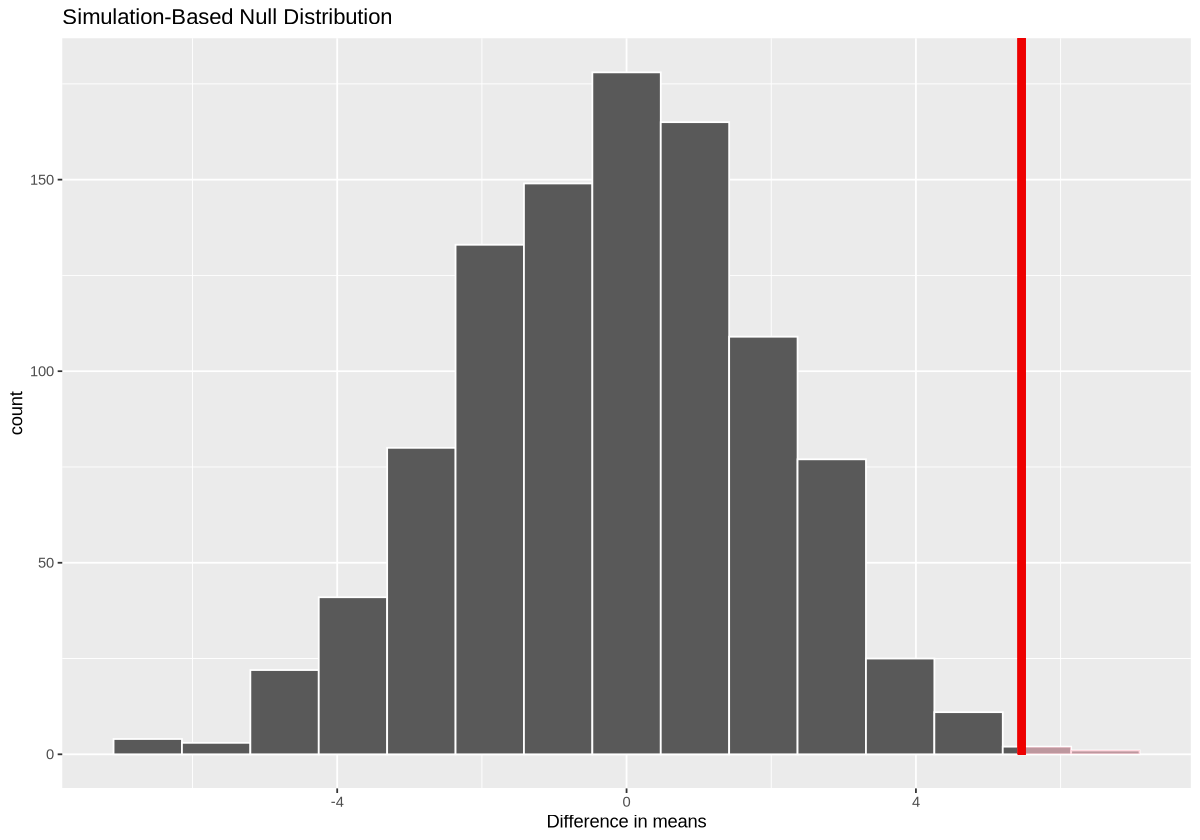

In [14]:
result_plot <- 
   null_model %>%
   visualize() + 
   shade_p_value(obs_stat = obs_mean_diff, direction = "right") +
xlab("Difference in means")

result_plot

[Graph 2.0]

We obtain the p-value for the observed difference in means be finding the probability that the difference in means is as extreme as our observed difference in means assuming the null model is true. Since we are conducting a one-sided hypothesis test, we find the area to the right of our observed difference.

In [15]:
p_value <- null_model |> 
    get_p_value(obs_stat = obs_mean_diff, direction = "right")

p_value

p_value
1 0.003

[Table 2.1]

Based on the null normal distribution, our p-value is 0.003, which is less our significance level (0.003 < 0.05), but also less than most common significance levels (eg. 0.05, 0.01). So we can reject the null hypothesis and conclude that patients with heart disease do have a higher mean blood pressure than patients without heart disease.

Since we don't know the true value of the population standard deviation of mean blood pressure, a t-test will account for the error when approximating the population standard deviation by the sample standard deviation.

In [16]:
t_test <- 
    tidy(
        t.test(x = mutate_data |> filter(heart_disease == "Present") |> pull(trestbps), 
               y = mutate_data |> filter(heart_disease == "Absent") |> pull(trestbps),
               alternative = "greater"))

t_test

estimate estimate1 estimate2 statistic p.value     parameter conf.low
1 5.460036 134.635   129.175   2.638548  0.004403773 271.2007  2.044618
  conf.high method                  alternative
1 Inf       Welch Two Sample t-test greater

[Table 2.2]

The obtained p-value from the t-test is approximately 0.0044, which is also less than our significance level of 0.05, so we can make the same conclusion as above. The result also makes sense as the p-value is slightly higher than the p-value obtained when assuming the null model is normal, since a t-distribution accounts for more error. However, due to both p-values being small enough to reject the null hypothesis, our sample size is sufficiently large such that a t-distribution is a good approximation of the true sampling distribution.

In [17]:
present <- 
    mutate_data %>% 
    filter(heart_disease == 'Present') %>% 
    pull(trestbps)

absent <- 
    mutate_data %>% 
    filter(heart_disease == 'Absent') %>% 
    pull(trestbps)

clt_ci <- 
    tibble(
        lower_ci = mean(present) - mean(absent) - qnorm(0.975) * sqrt(var(present)/length(present) + var(absent)/length(absent)),
        upper_ci = mean(present) - mean(absent) + qnorm(0.975) * sqrt(var(present)/length(present) + var(absent)/length(absent))
    )

clt_ci

lower_ci upper_ci
1 1.404217 9.515856

[Table 2.3]

In [18]:
bootstrap_ci <- 
    mutate_data %>% 
    specify(formula = trestbps ~ heart_disease) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat="diff in means", order = c("Present", "Absent")) %>% 
    get_ci()
bootstrap_ci

lower_ci upper_ci
1 1.524537 9.832829

[Table 2.4]

### Second Hypothesis Test (Cholesterol)

Observed difference in mean cholesterol in our sample between patients with heart disease `Present` and patients without heart disease `Absent`. We will conduct the hypothesis at the 0.05 (5%) significance level. 

In [20]:
obs_mean_diff <- 
    mutate_data %>% 
    filter(heart_disease %in% c("Present", "Absent")) %>%
    group_by(heart_disease) %>% 
    summarise(mean = mean(chol)) %>%
    pivot_wider(names_from = heart_disease, values_from = mean) %>%
    transmute(diff =  Present - Absent) %>%
    pull(diff)

obs_mean_diff

[1] 8.360265

We begin by assuming that the null hypothesis is true (that there is no true difference between mean cholesterols of patients with heart disease and patients without heart disease), and create a null distribution. We set the seed (41) so that our code creates reproducible results when run multiple times.

In [21]:
set.seed(41)
null_model <- 
   mutate_data %>% 
   specify(formula = chol ~ heart_disease) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Present", "Absent"))

head(null_model)

replicate stat      
1 1         -2.5739964
2 2          1.5314325
3 3         -3.9831204
4 4         -2.6281934
5 5         -0.4332117
6 6          9.6203467

[Table 3.0]

The null distribution for $H_0$:

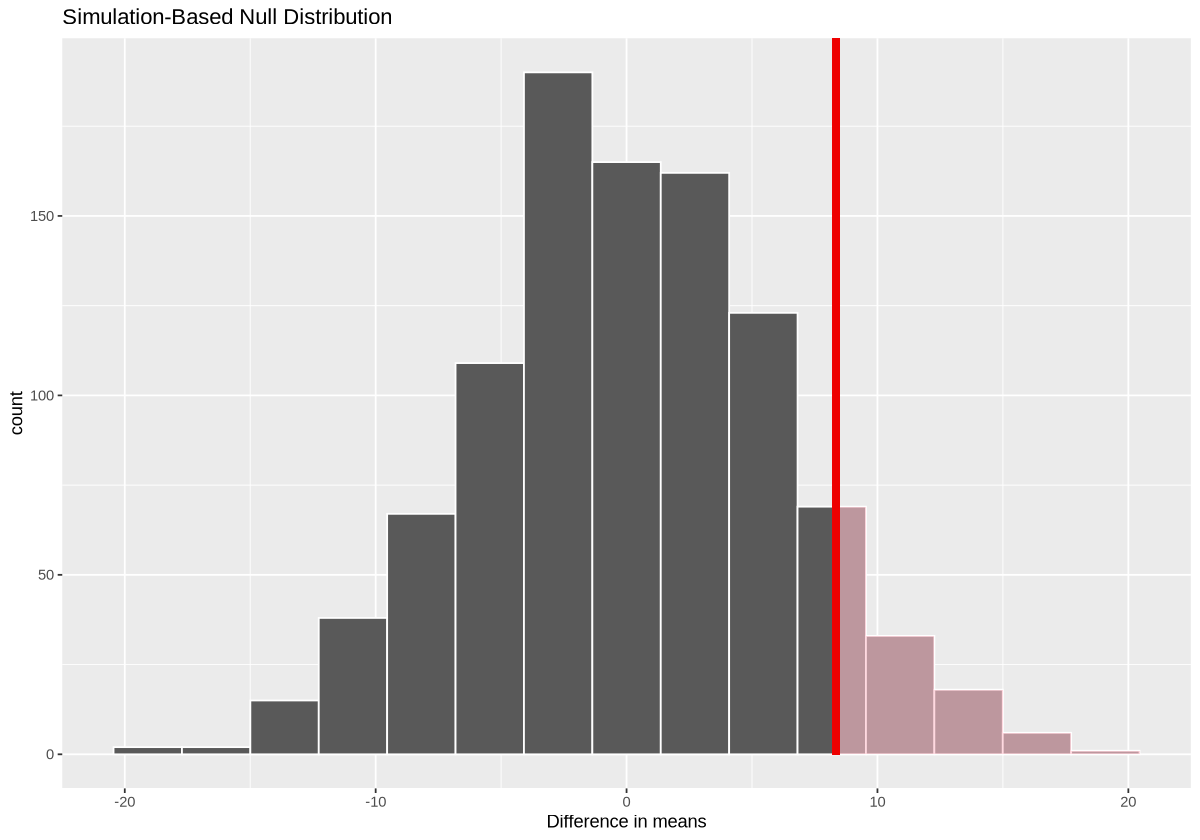

In [22]:
result_plot <- 
   null_model %>%
   visualize() + 
   shade_p_value(obs_stat = obs_mean_diff, direction = "right") +
xlab("Difference in means")

result_plot

[Graph 3.0]

We obtain the p-value for the observed difference in means be finding the probability that the difference in means is as extreme as our observed difference in means assuming the null model is true. Since we are conducting a one-sided hypothesis test, we find the area to the right of our observed difference.

In [23]:
p_value <- null_model |> 
    get_p_value(obs_stat = obs_mean_diff, direction = "right")

p_value

p_value
1 0.078

[Table 3.1]

Based on the null normal distribution, our p-value is 0.078, which is greater than our significance level (0.078 > 0.05). So we fail to reject the null hypothesis and conclude that patients with heart disease do not necessarily have a higher mean blood pressure than patients without heart disease.

Since we don't know the true value of the population standard deviation of mean blood pressure, a t-test will account for the error when approximating the population standard deviation by the sample standard deviation.

In [27]:
t_test <- 
    tidy(
        t.test(x = mutate_data |> filter(heart_disease == "Present") |> pull(chol), 
               y = mutate_data |> filter(heart_disease == "Absent") |> pull(chol),
               alternative = "greater"))

t_test

estimate estimate1 estimate2 statistic p.value    parameter conf.low 
1 8.360265 251.854   243.4938  1.391889  0.08250529 293.2651  -1.550716
  conf.high method                  alternative
1 Inf       Welch Two Sample t-test greater

[Table 3.2]

The obtained p-value from the t-test is approximately 0.0825, which is also greater than our significance level of 0.05, so we can make the same conclusion as above. The result also makes sense as the p-value is slightly higher than the p-value obtained when assuming the null model is normal, since a t-distribution accounts for more error. However, due to both p-values being too large to reject the null hypothesis, we cannot say which hypothesis testing method is better suited for cholesterol.

In [28]:
present <- 
    mutate_data %>% 
    filter(heart_disease == 'Present') %>% 
    pull(chol)

absent <- 
    mutate_data %>% 
    filter(heart_disease == 'Absent') %>% 
    pull(chol)

clt_ci <- 
    tibble(
        lower_ci = mean(present) - mean(absent) - qnorm(0.975) * sqrt(var(present)/length(present) + var(absent)/length(absent)),
        upper_ci = mean(present) - mean(absent) + qnorm(0.975) * sqrt(var(present)/length(present) + var(absent)/length(absent))
    )

clt_ci

lower_ci  upper_ci
1 -3.412091 20.13262

[Table 3.3]

In [29]:
bootstrap_ci <- 
    mutate_data %>% 
    specify(formula = chol ~ heart_disease) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat="diff in means", order = c("Present", "Absent")) %>% 
    get_ci()
bootstrap_ci

lower_ci upper_ci
1 1.524537 9.832829

[Table 3.4]

## Discussion
Future questions to be asked:
- Are blood pressures influenced by genetics or patient health statuses?
- Can other health attributes be linked to heart disease occurrences?
- Do higher blood pressure and cholesterol levels cause heart disease?

## References

Abd El-Wahab, E. W. (2020). Predicting coronary heart disease using risk assessment charts and Risk Factor categories. Journal of Public Health, 29(5), 1037–1045. https://doi.org/10.1007/s10389-020-01224-z 

High cholesterol: Causes, symptoms and how it affects the body. Cleveland Clinic. (2022, May 24). https://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases

Janosi, A., Steinbrunn, W., Pfisterer, M., &amp; Detrano, R. (1988, June 30). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Shiba, N., Nochioka, K., Miura, M., Kohno, H., &amp; Shimokawa, H. (2011). Trend of Westernization of etiology and clinical characteristics of heart failure patients in Japan. Circulation Journal, 75(4), 823–833. https://doi.org/10.1253/circj.cj-11-0135 